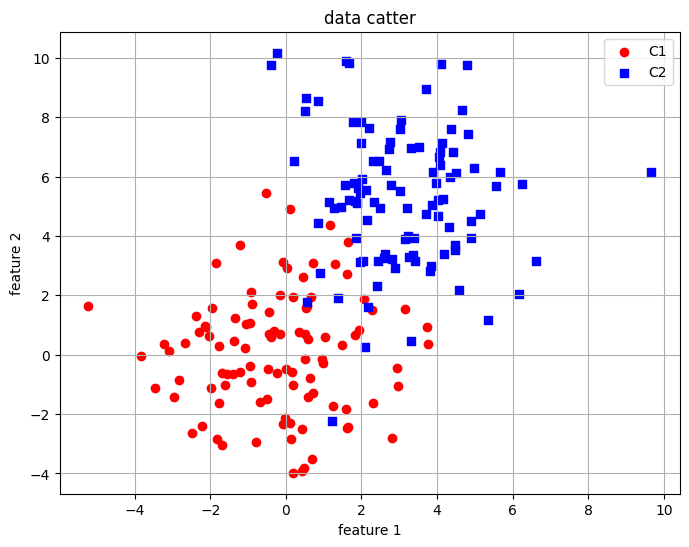

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 실행할 때마다 결과가 완전히 바뀌지는 않게 랜덤 시드를 고정
np.random.seed(42)

# C1 클래스의 평균과 공분산 설정
mu1 = np.array([0, 0])  # 평균값은 원점
cov1 = np.array([[4, 0], [0, 4]])  # x축, y축 방향으로 퍼진 정도가 4

# C2 클래스의 평균과 공분산
mu2 = np.array([3, 5])  # 평균 위치가 조금 오른쪽 위쪽
cov2 = np.array([[3, 0], [0, 5]])  # 비슷하게 퍼졌지만 좀 더 찌그러짐

# 가우시안 분포로부터 각 클래스 당 100개의 데이터를 뽑음
C1 = np.random.multivariate_normal(mu1, cov1, 100)
C2 = np.random.multivariate_normal(mu2, cov2, 100)

# 데이터 시각화를 위한 코드
plt.figure(figsize=(8, 6))
plt.scatter(C1[:, 0], C1[:, 1], c='red', marker='o', label='C1')  # 원으로 표시
plt.scatter(C2[:, 0], C2[:, 1], c='blue', marker='s', label='C2')  # 사각형으로 표시

# 축과 제목을 설정
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("data catter")
plt.legend()

# 그래프 보여주기
plt.grid(True)
plt.show()

== 판별 결과 ==
공통 공분산 가정:
x1 → C1, x2 → C1
일반 공분산 가정:
x1 → C1, x2 → C1


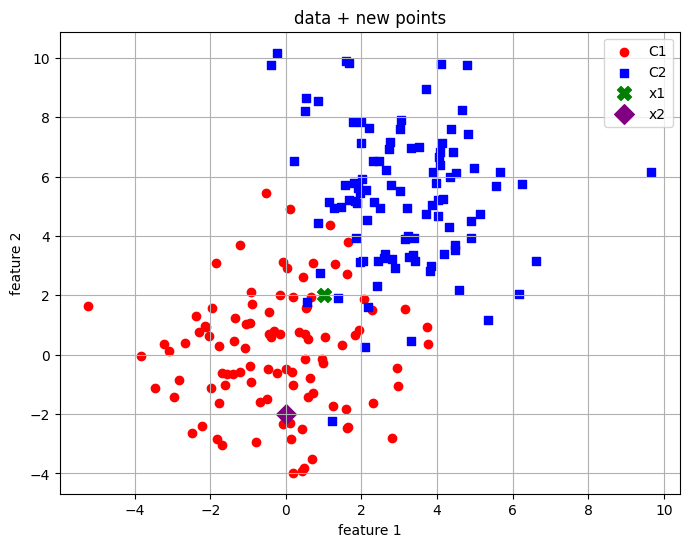

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, det

# 랜덤 시드를 고정
np.random.seed(42)

# 클래스 C1의 평균과 공분산 정의
mu1 = np.array([0, 0])  # C1은 원점 근처
cov1 = np.array([[4, 0], [0, 4]])  # 대각 공분산 → x, y가 독립적이고 퍼짐 정도는 4

# 클래스 C2의 평균과 공분산 정의
mu2 = np.array([3, 5])  # C2는 오른쪽 위로 이동된 위치
cov2 = np.array([[3, 0], [0, 5]])  # C2는 약간 찌그러진 타원형 분포

# 각 클래스에서 100개의 샘플을 추출 (2차원 가우시안 분포)
C1 = np.random.multivariate_normal(mu1, cov1, 100)
C2 = np.random.multivariate_normal(mu2, cov2, 100)

# 새로 들어온 데이터 2개 (x1, x2)를 정의
x1 = np.array([1, 2])
x2 = np.array([0, -2])
new_points = np.array([x1, x2])  # loop를 돌리려고 리스트에 담음

# 공통 공분산 행렬을 계산
shared_cov = (cov1 + cov2) / 2

# [클래스 공통 공분산행렬을 가정한] 경우의 판별 함수
def g_shared(x, mu, cov):
    return -0.5 * np.dot(np.dot((x - mu).T, inv(cov)), (x - mu))

# [일반적인 공분산행렬을 가정한] 경우의 판별 함수
def g_general(x, mu, cov):
    term1 = -0.5 * np.log(det(cov))  # 분산이 클수록 불리함
    term2 = -0.5 * np.dot(np.dot((x - mu).T, inv(cov)), (x - mu))
    return term1 + term2

# 결과 리스트
labels_shared = []    # 공통 공분산 가정했을 때 결과
labels_general = []   # 일반 공분산 가정했을 때 결과

# 각 x에 대해 두 모델로 분류
for x in new_points:
    # 공통 공분산 가정한 판별 함수 계산
    g1 = g_shared(x, mu1, shared_cov)
    g2 = g_shared(x, mu2, shared_cov)
    label = 'C1' if g1 > g2 else 'C2'
    labels_shared.append(label)

    # 일반 공분산 가정한 판별 함수 계산
    g1_gen = g_general(x, mu1, cov1)
    g2_gen = g_general(x, mu2, cov2)
    label_gen = 'C1' if g1_gen > g2_gen else 'C2'
    labels_general.append(label_gen)

# 분류 결과를 출력
print("== 판별 결과 ==")
print("공통 공분산 가정:")
print(f"x1 → {labels_shared[0]}, x2 → {labels_shared[1]}")
print("일반 공분산 가정:")
print(f"x1 → {labels_general[0]}, x2 → {labels_general[1]}")

# 산점도
plt.figure(figsize=(8,6))

# 원래 데이터
plt.scatter(C1[:,0], C1[:,1], c='red', marker='o', label='C1')
plt.scatter(C2[:,0], C2[:,1], c='blue', marker='s', label='C2')

plt.scatter(x1[0], x1[1], c='green', marker='X', s=100, label='x1')  # 초록색 X 표시
plt.scatter(x2[0], x2[1], c='purple', marker='D', s=100, label='x2')  # 보라색 다이아몬드

# 축과 제목을 설정
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("data + new points")
plt.legend()

# 그래프 보여주기
plt.grid(True)
plt.show()